In [1]:
from preprocessing import *
from main import *
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
htgr_mini = {'depth': 1, 'grid': 5, 'k': 4, 'lamb': 2.63584570163326e-06, 'lamb_entropy': 3.02497466094173, 'lr_1': 0.75, 'lr_2': 1.5, 'steps': 25, 'reg_metric':'edge_backward'}

# load your dataset from preprocessing
dataset = get_htgr(cuda=True)

DEVICE: cuda


In [3]:
# define your NKAN object
htgr_kan = NKAN(dataset, 42, device, htgr_mini)

checkpoint directory created: ./model
saving model version 0.0


In [4]:
# initialize and train your model
model = htgr_kan.get_model(save=True, save_as='HTGR_mini')

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]

| train_loss: 1.27e-02 | test_loss: 1.33e-02 | reg: 1.80e+01 | : 100%|█| 25/25 [00:07<00:00,  3.56it


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 1.91e-02 | test_loss: 1.96e-02 | reg: 1.54e+01 | : 100%|█| 25/25 [00:07<00:00,  3.54it

saving model version 0.3
Model pruned and re-trained.


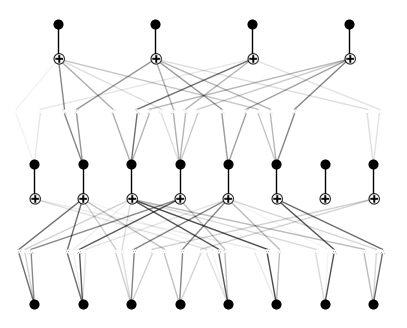

In [5]:
model.plot()

In [6]:
htgr_kan.get_metrics(model, 'HTGR_mini')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,fluxQ1,0.0004,0.1648,0.0,0.0005,0.2054,0.9850
1,fluxQ2,0.0004,0.1560,0.0,0.0005,0.1953,0.9864
2,fluxQ3,0.0004,0.1505,0.0,0.0005,0.1891,0.9872
3,fluxQ4,0.0004,0.1661,0.0,0.0005,0.2077,0.9846


In [7]:
htgr_kan.get_equation(model, 'HTGR_mini_s0', simple=0, metrics=True)

fixing (0,0,0) with 0
fixing (0,0,1) with gaussian, r2=0.9996272943048353, c=3
fixing (0,0,2) with sin, r2=0.9941556523774614, c=2
fixing (0,0,3) with sin, r2=0.9997771683240682, c=2
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,0,6) with 0
fixing (0,0,7) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with gaussian, r2=0.9998344393480446, c=3
fixing (0,1,2) with gaussian, r2=0.8788805839276657, c=3
fixing (0,1,3) with gaussian, r2=0.996935181576467, c=3
fixing (0,1,4) with gaussian, r2=0.7626783356736443, c=3
fixing (0,1,5) with 0
fixing (0,1,6) with 0
fixing (0,1,7) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with gaussian, r2=0.9984714236510757, c=3
fixing (0,2,2) with sin, r2=0.9987294667957207, c=2
fixing (0,2,3) with 0
fixing (0,2,4) with gaussian, r2=0.9998219283787365, c=3
fixing (0,2,5) with 0
fixing (0,2,6) with 0
fixing (0,2,7) with cos, r2=0.9928844309213818, c=2
fixing (0,3,0) with 0
fixing (0,3,1) with gaussian, r2=0.9977311147308932, c=3
fixing (0,3,2) with 0
fixing 

[0.0244*Abs(-0.8745*sin(6.4995*x_1 - 4.4562) + 0.4405*sin(6.1305*x_5 + 7.4413) + 0.5815 + 2.7862*exp(-16.0134*(x_2 - 0.5198)**2)) - 0.281*atan(0.2248*cos(6.2901*x_8 + 2.7516) - 0.9936 + 0.6193*exp(-10.7322*(0.4843 - x_7)**2)) - 0.8186*atan(1.5259 - 0.5951*exp(-12.1293*(0.5119 - x_2)**2) + 0.1778*exp(-12.2304*(0.5042 - x_3)**2) + 0.2292*exp(-12.3476*(0.4931 - x_4)**2) - 0.6231*exp(-10.24*(0.4638 - x_1)**2) + 0.0379*exp(-44.8589*(0.411 - x_5)**2)) + 0.6685*atan(0.0304*sin(6.8384*x_1 + 4.1702) - 0.023*sin(6.7036*x_3 - 4.456) + 0.8889 - 0.3068*exp(-10.2964*(0.5303 - x_5)**2) + 0.0998*exp(-12.6514*(0.5073 - x_8)**2) - 0.3258*exp(-11.7819*(0.4897 - x_6)**2) + 0.0536*exp(-14.44*(0.4589 - x_7)**2) + 0.022*exp(-44.89*(0.2157 - x_2)**2)) + 0.4363 + 0.0707*exp(-0.2284*(cos(5.8421*x_5 + 2.5818) + 0.6729*cos(6.2155*x_6 - 2.6166) - 0.2924)**2),
 0.0044*(-0.7067*cos(5.997*x_3 - 3.388) - 0.6447*cos(6.3126*x_4 - 8.7505) - 1)**4 - 0.3141*tan(0.1539*sin(6.4995*x_1 - 4.4562) - 0.0775*sin(6.1305*x_5 + 7.44

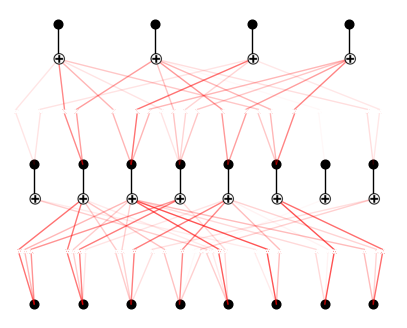

In [24]:
model.plot()